In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

batch_size = 32
transform = transforms.Compose([transforms.ToTensor()])

testset = torchvision.datasets.CIFAR10(
    root="./data", train=False, download=False, transform=transform
)

trainset = torchvision.datasets.CIFAR10(
    root="./data", train=True, download=False, transform=transform
)

test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

In [2]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

print(device)

cpu


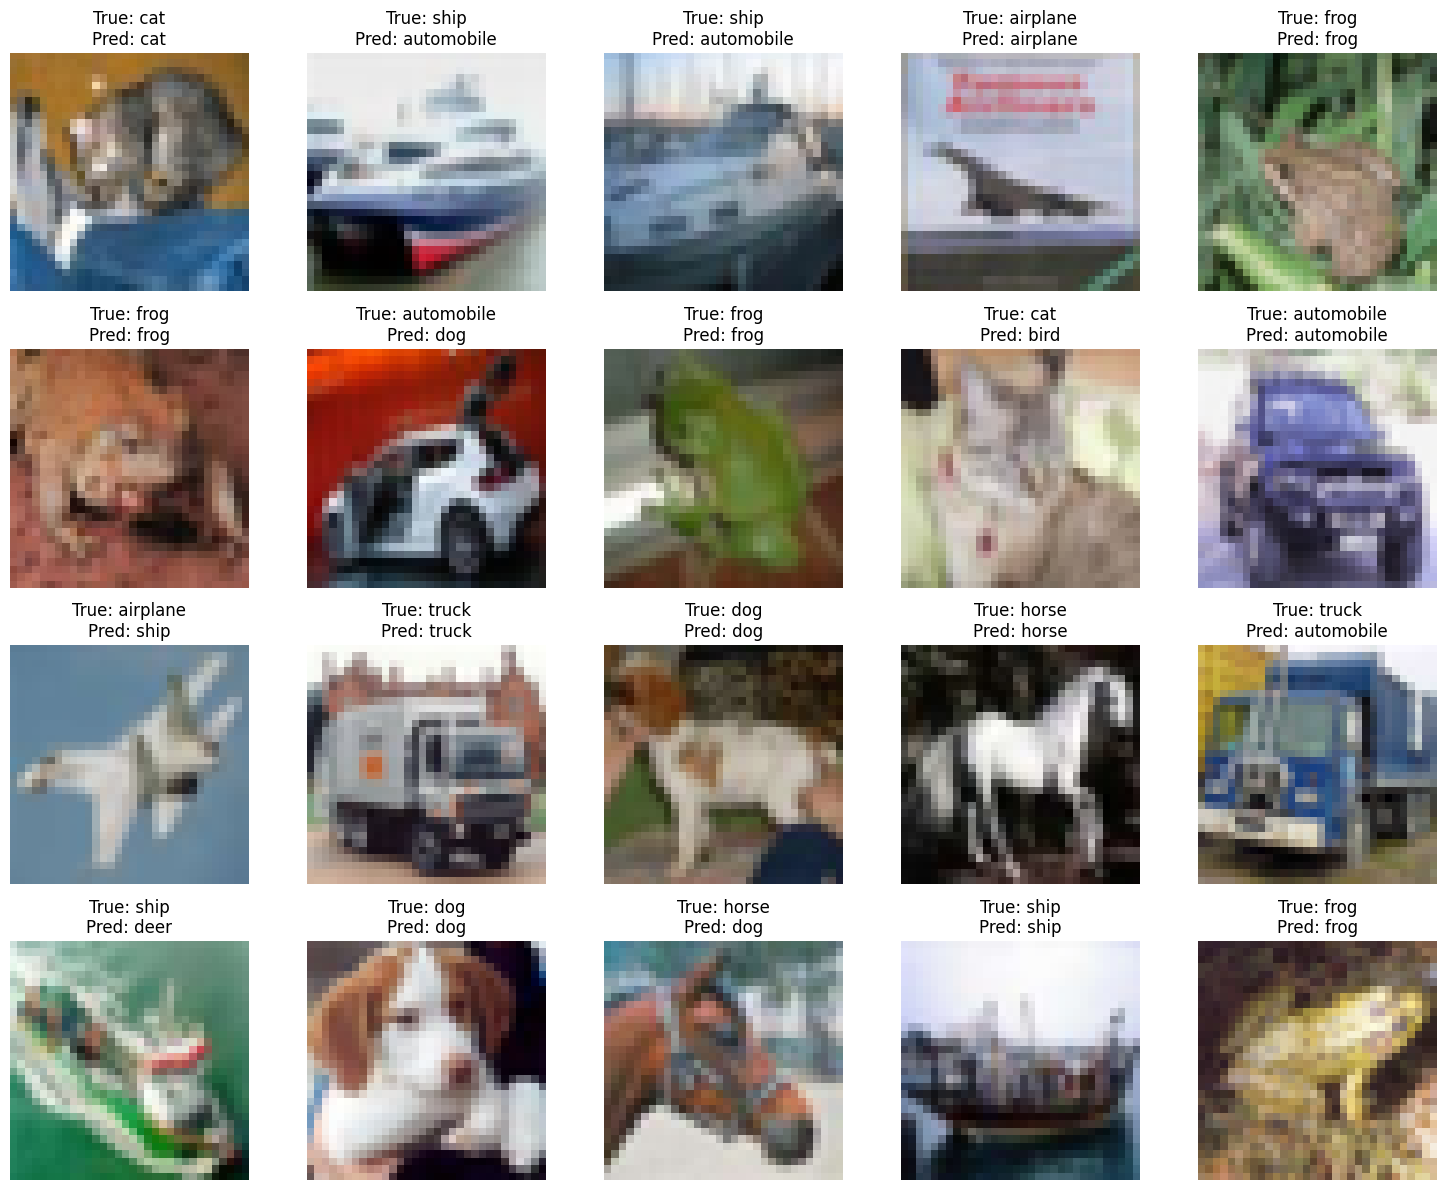

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Helper function to display images with predicted and true labels in a grid
def show_images(images, true_labels, predicted_labels, classes, nrow=5):
    n_images = len(images)
    ncol = nrow
    nrows = (n_images + ncol - 1) // ncol  # Calculate rows needed based on ncol

    fig, axes = plt.subplots(nrows, ncol, figsize=(15, 3 * nrows))
    axes = axes.flatten()  # Flatten to easily iterate over in case of fewer images

    for idx, ax in enumerate(axes):
        if idx < n_images:
            img = images[idx].cpu().numpy().transpose((1, 2, 0))  # Convert for display
            img = np.clip(img, 0, 1)  # Ensure values are in [0, 1] range
            ax.imshow(img)
            ax.axis('off')
            ax.set_title(f"True: {classes[true_labels[idx]]}\nPred: {classes[predicted_labels[idx]]}")
        else:
            ax.axis('off')  # Hide any extra axes if fewer images

# Select a larger batch of images from the test set
net.eval()
with torch.no_grad():
    dataiter = iter(test_loader)
    images, labels = next(dataiter)
    images, labels = images[:20].to(device), labels[:20].to(device)  # Select first 20 images (adjust as needed)
    outputs = net(images)
    _, predictions = torch.max(outputs, 1)

# Show images with true and predicted labels in a grid format
show_images(images, labels, predictions, classes, nrow=5)
plt.tight_layout()
plt.show()


In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class LeNet5(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2)
        )
        
        self.fc_layers = nn.Sequential(
            nn.Linear(in_features=16 * 5 * 5, out_features=120),
            nn.ReLU(),
            nn.Linear(in_features=120, out_features=84),
            nn.ReLU(),
            nn.Linear(in_features=84, out_features=10),
            nn.Softmax(dim=1) 
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(-1, 16 * 5 * 5)
        x = self.fc_layers(x)
        return x

model = LeNet5()
print(model)

LeNet5(
  (conv_layers): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=400, out_features=120, bias=True)
    (1): ReLU()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): ReLU()
    (4): Linear(in_features=84, out_features=10, bias=True)
    (5): Softmax(dim=1)
  )
)


In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchviz import make_dot

dummy_input = torch.randn(1, 3, 32, 32)
# Forward pass to visualize the model
output = model(dummy_input)
# Generate the grap
make_dot(output, params=dict(model.named_parameters())).render("lenet5_model", format="png")

'lenet5_model.png'

In [6]:
layer = nn.Linear(100, 64)
print("Inicjalizacja wag dla warstwy Linear:", layer.weight)
nn.init.kaiming_normal_(layer.weight, mode='fan_in', nonlinearity='relu')

Inicjalizacja wag dla warstwy Linear: Parameter containing:
tensor([[-0.0623,  0.0491,  0.0193,  ..., -0.0032, -0.0822, -0.0488],
        [ 0.0872,  0.0063, -0.0682,  ..., -0.0454, -0.0443,  0.0912],
        [-0.0583,  0.0874, -0.0690,  ..., -0.0032, -0.0444, -0.0507],
        ...,
        [ 0.0376,  0.0451, -0.0227,  ..., -0.0739,  0.0724, -0.0467],
        [-0.0603,  0.0318, -0.0866,  ..., -0.0183, -0.0941, -0.0437],
        [-0.0008,  0.0897, -0.0113,  ...,  0.0826, -0.0006,  0.0238]],
       requires_grad=True)


Parameter containing:
tensor([[ 0.1804, -0.1704,  0.0107,  ...,  0.1814, -0.0583,  0.4138],
        [-0.1727,  0.1320,  0.1917,  ...,  0.2048, -0.0689, -0.2460],
        [ 0.0435, -0.0314, -0.2287,  ..., -0.0205,  0.2185, -0.0591],
        ...,
        [-0.0901,  0.0801, -0.2469,  ..., -0.0669, -0.2127, -0.2687],
        [-0.3237,  0.0527, -0.1445,  ...,  0.1421,  0.0971,  0.0140],
        [-0.0562, -0.0520, -0.0218,  ..., -0.1400,  0.0242,  0.0474]],
       requires_grad=True)

In [7]:
import torch.optim as optim

learning_rate = 0.001
net = LeNet5().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

In [8]:
from torch.utils.data import random_split, DataLoader

train_size = int(0.9 * len(trainset))
val_size = len(trainset) - train_size

train_subset, val_subset = random_split(trainset, [train_size, val_size])

train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)

In [10]:
num_epochs = 10

for epoch in range(num_epochs):
    model.train()  
    running_loss = 0.0
    
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
        epoch_loss = running_loss / len(train_loader)
    print(f"Epoka [{epoch+1}/{num_epochs}], Strata treningowa: {epoch_loss:.4f}")

    model.eval()  
    val_loss = 0.0
    with torch.no_grad(): 
        for inputs, labels in valid_loader:
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    
    val_loss /= len(valid_loader)
    print(f"Strata walidacyjna: {val_loss:.4f}")

print("Trening zakończony.")

Epoka [1/10], Strata treningowa: 2.0982
Strata walidacyjna: 2.0702
Epoka [2/10], Strata treningowa: 2.0647
Strata walidacyjna: 2.0633
Epoka [3/10], Strata treningowa: 2.0428
Strata walidacyjna: 2.0338
Epoka [4/10], Strata treningowa: 2.0253
Strata walidacyjna: 2.0318
Epoka [5/10], Strata treningowa: 2.0078
Strata walidacyjna: 1.9926
Epoka [6/10], Strata treningowa: 1.9941
Strata walidacyjna: 1.9968
Epoka [7/10], Strata treningowa: 1.9832
Strata walidacyjna: 1.9813
Epoka [8/10], Strata treningowa: 1.9745
Strata walidacyjna: 1.9878
Epoka [9/10], Strata treningowa: 1.9617
Strata walidacyjna: 1.9723
Epoka [10/10], Strata treningowa: 1.9589
Strata walidacyjna: 1.9641
Trening zakończony.


In [12]:
classes_pred = {classname: 0 for classname in classes}
classes_total = {classname: 0 for classname in classes}

total_correct = 0
total_images = 0

net.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = map(lambda x: x.to(device), data)
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)

        total_images += labels.size(0)  

        for expected, predicted in zip(labels, predictions):
            classes_total[classes[expected]] += 1 
            if expected == predicted:
                classes_pred[classes[predicted]] += 1 
                total_correct += 1  

for classname, count in classes_pred.items():
    accuracy = float(count) / classes_total[classname] if classes_total[classname] > 0 else 0
    print("Accuracy for {:<13}: {:.2%}".format("[" + classname + "]", accuracy))

overall_accuracy = total_correct / total_images if total_images > 0 else 0
print(f'Overall Accuracy for the entire test dataset: {overall_accuracy:.2%}')

Accuracy for [airplane]   : 72.20%
Accuracy for [automobile] : 68.20%
Accuracy for [bird]       : 33.20%
Accuracy for [cat]        : 33.90%
Accuracy for [deer]       : 65.30%
Accuracy for [dog]        : 56.80%
Accuracy for [frog]       : 65.20%
Accuracy for [horse]      : 65.60%
Accuracy for [ship]       : 72.70%
Accuracy for [truck]      : 59.50%
Overall Accuracy for the entire test dataset: 59.26%


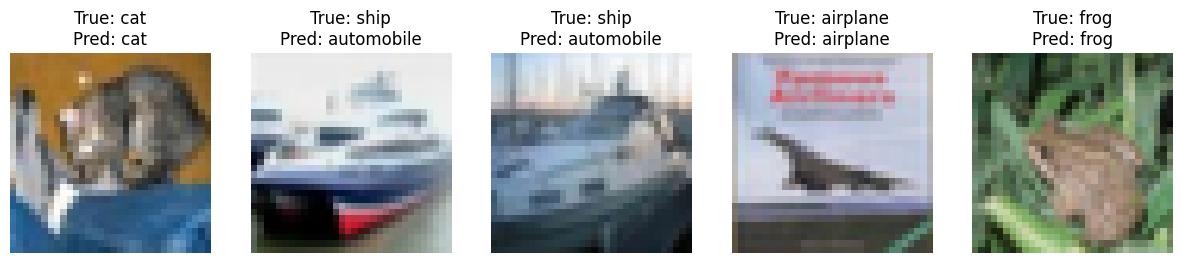

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Helper function to display images with predicted and true labels
def show_images(images, true_labels, predicted_labels, classes):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    for idx, ax in enumerate(axes):
        img = images[idx].cpu().numpy().transpose((1, 2, 0))  # Convert image for display
        img = np.clip(img, 0, 1)  # Ensure values are in [0, 1] for visualization
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f"True: {classes[true_labels[idx]]}\nPred: {classes[predicted_labels[idx]]}")

# Select a few images manually from the test set
net.eval()
with torch.no_grad():
    dataiter = iter(test_loader)
    images, labels = next(dataiter)
    images, labels = images[:5].to(device), labels[:5].to(device)  # Select first 5 images (adjust as needed)
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)

# Show images with true and predicted labels
show_images(images, labels, predicted, classes)
plt.show()


In [11]:
import optuna
from optuna import trial

from copy import deepcopy

/home/dominiq/Desktop/MRO/myenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [42]:
# Hyperparameters
RANDOM_SEED = 1
LEARNING_RATE = 0.001
BATCH_SIZE = 32
NUM_EPOCHS = 10
EARLY_STOPPING_PATIENCE = 10
MAX_EPOCHS = 30

# Architecture
NUM_FEATURES = 28*28
NUM_CLASSES = 10

# Other
DEVICE = "cpu"
GRAYSCALE = False

In [82]:
class LeNet(nn.Module):
    def __init__(self, num_classes, num_conv_layers, dropout_p):
        super(LeNet, self).__init__()
        
        self.num_conv_layers = num_conv_layers
        self.dropout_p = dropout_p
        self.conv_layers = nn.ModuleList()
        in_channels = 3

        self.output_size = 32  # Assuming input images are 32x32
        
        for i in range(num_conv_layers):
            out_channels = 2 ** (i + 3)  # Increase number of channels
            
            # Add convolutional layer
            self.conv_layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1))
            self.conv_layers.append(nn.ReLU())
            # Add pooling layer
            self.conv_layers.append(nn.AvgPool2d(kernel_size=2, stride=2))
            in_channels = out_channels
            
            # Calculate new output size after this layer
            self.output_size = (self.output_size // 2)  # After pooling, the size is halved

        self.fc_layers = nn.Sequential(
            nn.Linear(out_channels * self.output_size * self.output_size, 120),
            nn.ReLU(),
            nn.Dropout(dropout_p),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Dropout(dropout_p),
            nn.Linear(84, num_classes)
        )

    def forward(self, x):
        for layer in self.conv_layers:
            x = layer(x)
        
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.fc_layers(x)
        return x

In [95]:
from copy import deepcopy
import numpy as np
import torch
from sklearn.metrics import accuracy_score

def train_loop(model, optimizer, loss_fn, train_dataloader, test_dataloader, classes, device, max_epochs=10, early_stopping_patience=3):
    steps_without_improvement = 0
    best_overall_accuracy = 0
    best_model_state = None  
    
    num_classes = len(classes)
    classes_pred = torch.zeros(num_classes, dtype=torch.int32, device=device)
    classes_total = torch.zeros(num_classes, dtype=torch.int32, device=device)

    for epoch in range(max_epochs):
        model.train()

        for X_batch, y_batch in train_dataloader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            
            outputs = model(X_batch)
            loss = loss_fn(outputs, y_batch)
            
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        model.eval()
        total_correct = 0
        total_images = 0
        
        classes_pred.zero_()
        classes_total.zero_()

        with torch.no_grad():
            for images, labels in test_dataloader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predictions = torch.max(outputs, 1)

                total_images += labels.size(0)
                total_correct += (predictions == labels).sum().item()

                for class_idx in range(num_classes):
                    class_mask = labels == class_idx
                    classes_total[class_idx] += class_mask.sum().item()
                    classes_pred[class_idx] += (predictions[class_mask] == class_idx).sum().item()

        class_accuracies = (classes_pred.float() / classes_total.clamp(min=1)).cpu().numpy()
        for classname, class_accuracy in zip(classes, class_accuracies):
            print(f"Accuracy for [{classname:<13}]: {class_accuracy:.2%}")

        overall_accuracy = total_correct / total_images
        print(f'Overall Accuracy for the entire test dataset: {overall_accuracy:.2%}')
        
        if overall_accuracy > best_overall_accuracy:
            best_overall_accuracy = overall_accuracy
            steps_without_improvement = 0
            best_model_state = deepcopy(model.state_dict())  
        else:
            steps_without_improvement += 1
            if steps_without_improvement == early_stopping_patience:
                model.load_state_dict(best_model_state)
                return model, best_overall_accuracy

    model.load_state_dict(best_model_state)
    return model, best_overall_accuracy


In [98]:
import torch.nn.functional as F
import logging

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

def objective(trial):
    learning_rate   = trial.suggest_float('learning_rate', 1e-4, 1e-2)
    batch_size      = trial.suggest_categorical('batch_size', [32, 64, 128])
    l2_strength     = trial.suggest_float('l2_strength', 1e-4, 1e-2)
    dropout_prob    = trial.suggest_float('dropout_prob', 0.0, 0.5)
    num_conv_layers = trial.suggest_int('num_conv_layers', 2, 5) 

    model = LeNet(
        num_classes=NUM_CLASSES,
        num_conv_layers = num_conv_layers, 
        dropout_p=dropout_prob).to(device)

    loss_fn = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=l2_strength)

    test_dataloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)
    train_dataloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

    best_model, val_accuracy = train_loop(
        model = model, 
        optimizer = optimizer, 
        loss_fn = loss_fn,
        train_dataloader =  test_dataloader,
        test_dataloader = train_dataloader,
        classes = classes, 
        device = device, 
        max_epochs = MAX_EPOCHS, 
        early_stopping_patience = EARLY_STOPPING_PATIENCE
        )   

    logger.info(f'Trial {trial.number}: learning_rate={learning_rate}, batch_size={batch_size}, '
                f'l2_strength={l2_strength}, dropout_prob={dropout_prob} => Accuracy={val_accuracy}')


    return val_accuracy

In [99]:
study_tpe = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())
study_tpe.optimize(objective, n_trials=3, n_jobs=9)


print("Najlepsze hiperparametry (TPE):", study_tpe.best_params)
print("Najlepsza wartość metryki (TPE):", study_tpe.best_value)

[I 2024-10-26 18:57:10,012] A new study created in memory with name: no-name-1ddc248f-5ef2-495e-b85f-b7121c9a71bb


Accuracy for [airplane     ]: 61.84%
Accuracy for [automobile   ]: 33.16%
Accuracy for [bird         ]: 4.78%
Accuracy for [cat          ]: 3.98%
Accuracy for [deer         ]: 41.82%
Accuracy for [dog          ]: 48.70%
Accuracy for [frog         ]: 18.46%
Accuracy for [horse        ]: 23.88%
Accuracy for [ship         ]: 37.28%
Accuracy for [truck        ]: 34.06%
Overall Accuracy for the entire test dataset: 30.80%
Accuracy for [airplane     ]: 51.36%
Accuracy for [automobile   ]: 15.24%
Accuracy for [bird         ]: 0.08%
Accuracy for [cat          ]: 29.64%
Accuracy for [deer         ]: 23.48%
Accuracy for [dog          ]: 3.10%
Accuracy for [frog         ]: 46.90%
Accuracy for [horse        ]: 24.52%
Accuracy for [ship         ]: 21.84%
Accuracy for [truck        ]: 50.24%
Overall Accuracy for the entire test dataset: 26.64%
Accuracy for [airplane     ]: 0.00%
Accuracy for [automobile   ]: 0.00%
Accuracy for [bird         ]: 0.00%
Accuracy for [cat          ]: 0.00%
Accuracy for [

KeyboardInterrupt: 

Accuracy for [airplane     ]: 43.78%
Accuracy for [automobile   ]: 70.34%
Accuracy for [bird         ]: 35.18%
Accuracy for [cat          ]: 10.74%
Accuracy for [deer         ]: 32.66%
Accuracy for [dog          ]: 48.56%
Accuracy for [frog         ]: 51.36%
Accuracy for [horse        ]: 37.00%
Accuracy for [ship         ]: 76.40%
Accuracy for [truck        ]: 36.26%
Overall Accuracy for the entire test dataset: 44.23%
Accuracy for [airplane     ]: 0.00%
Accuracy for [automobile   ]: 0.00%
Accuracy for [bird         ]: 0.00%
Accuracy for [cat          ]: 0.00%
Accuracy for [deer         ]: 0.00%
Accuracy for [dog          ]: 0.00%
Accuracy for [frog         ]: 100.00%
Accuracy for [horse        ]: 0.00%
Accuracy for [ship         ]: 0.00%
Accuracy for [truck        ]: 0.00%
Overall Accuracy for the entire test dataset: 10.00%
Accuracy for [airplane     ]: 51.36%
Accuracy for [automobile   ]: 59.22%
Accuracy for [bird         ]: 33.42%
Accuracy for [cat          ]: 15.40%
Accuracy for [

2024-10-26 20:06:35,908 - INFO - Trial 0: learning_rate=0.005464636558801691, batch_size=32, l2_strength=0.008547376462668612, dropout_prob=0.18101063083903618 => Accuracy=0.1
[I 2024-10-26 20:06:35,920] Trial 0 finished with value: 0.1 and parameters: {'learning_rate': 0.005464636558801691, 'batch_size': 32, 'l2_strength': 0.008547376462668612, 'dropout_prob': 0.18101063083903618, 'num_conv_layers': 4}. Best is trial 0 with value: 0.1.


Accuracy for [airplane     ]: 0.00%
Accuracy for [automobile   ]: 0.00%
Accuracy for [bird         ]: 0.00%
Accuracy for [cat          ]: 0.00%
Accuracy for [deer         ]: 0.00%
Accuracy for [dog          ]: 0.00%
Accuracy for [frog         ]: 100.00%
Accuracy for [horse        ]: 0.00%
Accuracy for [ship         ]: 0.00%
Accuracy for [truck        ]: 0.00%
Overall Accuracy for the entire test dataset: 10.00%
Accuracy for [airplane     ]: 56.12%
Accuracy for [automobile   ]: 70.48%
Accuracy for [bird         ]: 44.42%
Accuracy for [cat          ]: 18.42%
Accuracy for [deer         ]: 37.98%
Accuracy for [dog          ]: 34.86%
Accuracy for [frog         ]: 64.02%
Accuracy for [horse        ]: 40.42%
Accuracy for [ship         ]: 59.16%
Accuracy for [truck        ]: 43.14%
Overall Accuracy for the entire test dataset: 46.90%
Accuracy for [airplane     ]: 52.48%
Accuracy for [automobile   ]: 61.58%
Accuracy for [bird         ]: 44.30%
Accuracy for [cat          ]: 20.50%
Accuracy for [